Dataset: coin_ChainLink
   SNo       Name Symbol                 Date      High       Low      Open  \
0    1  Chainlink   LINK  2017-09-21 23:59:59  0.207892  0.155292  0.189132   
1    2  Chainlink   LINK  2017-09-22 23:59:59  0.181675  0.139869  0.169826   
2    3  Chainlink   LINK  2017-09-23 23:59:59  0.157440  0.126297  0.149562   
3    4  Chainlink   LINK  2017-09-24 23:59:59  0.190250  0.130275  0.131110   
4    5  Chainlink   LINK  2017-09-25 23:59:59  0.182637  0.158580  0.170636   

      Close     Volume   Marketcap  
0  0.169680  2126270.0  59388000.0  
1  0.150503  1423220.0  52676050.0  
2  0.131129  1186670.0  45895150.0  
3  0.170278  1025740.0  59597300.0  
4  0.182198  1021370.0  63769300.0   

Dataset: coin_Cardano
   SNo     Name Symbol                 Date      High       Low      Open  \
0    1  Cardano    ADA  2017-10-02 23:59:59  0.030088  0.019969  0.024607   
1    2  Cardano    ADA  2017-10-03 23:59:59  0.027425  0.020690  0.025757   
2    3  Cardano    ADA  

<Figure size 1400x700 with 0 Axes>

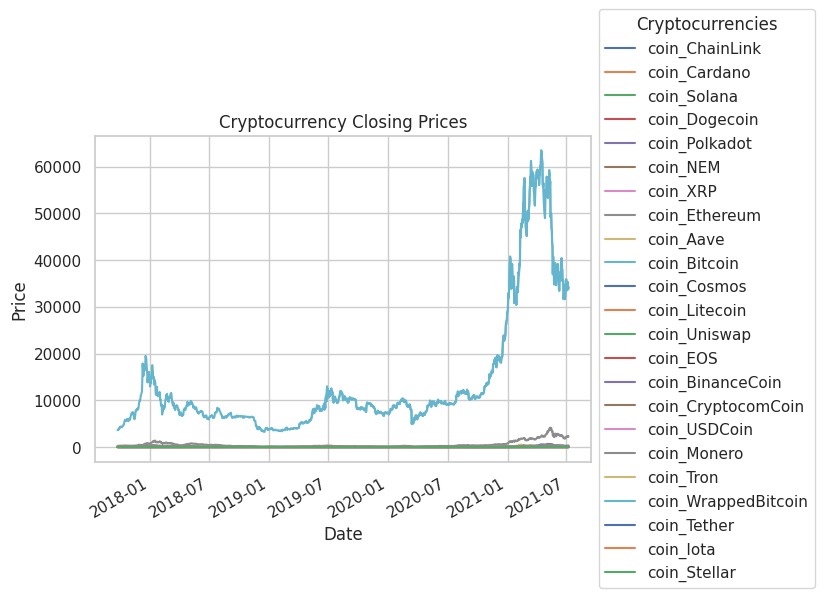

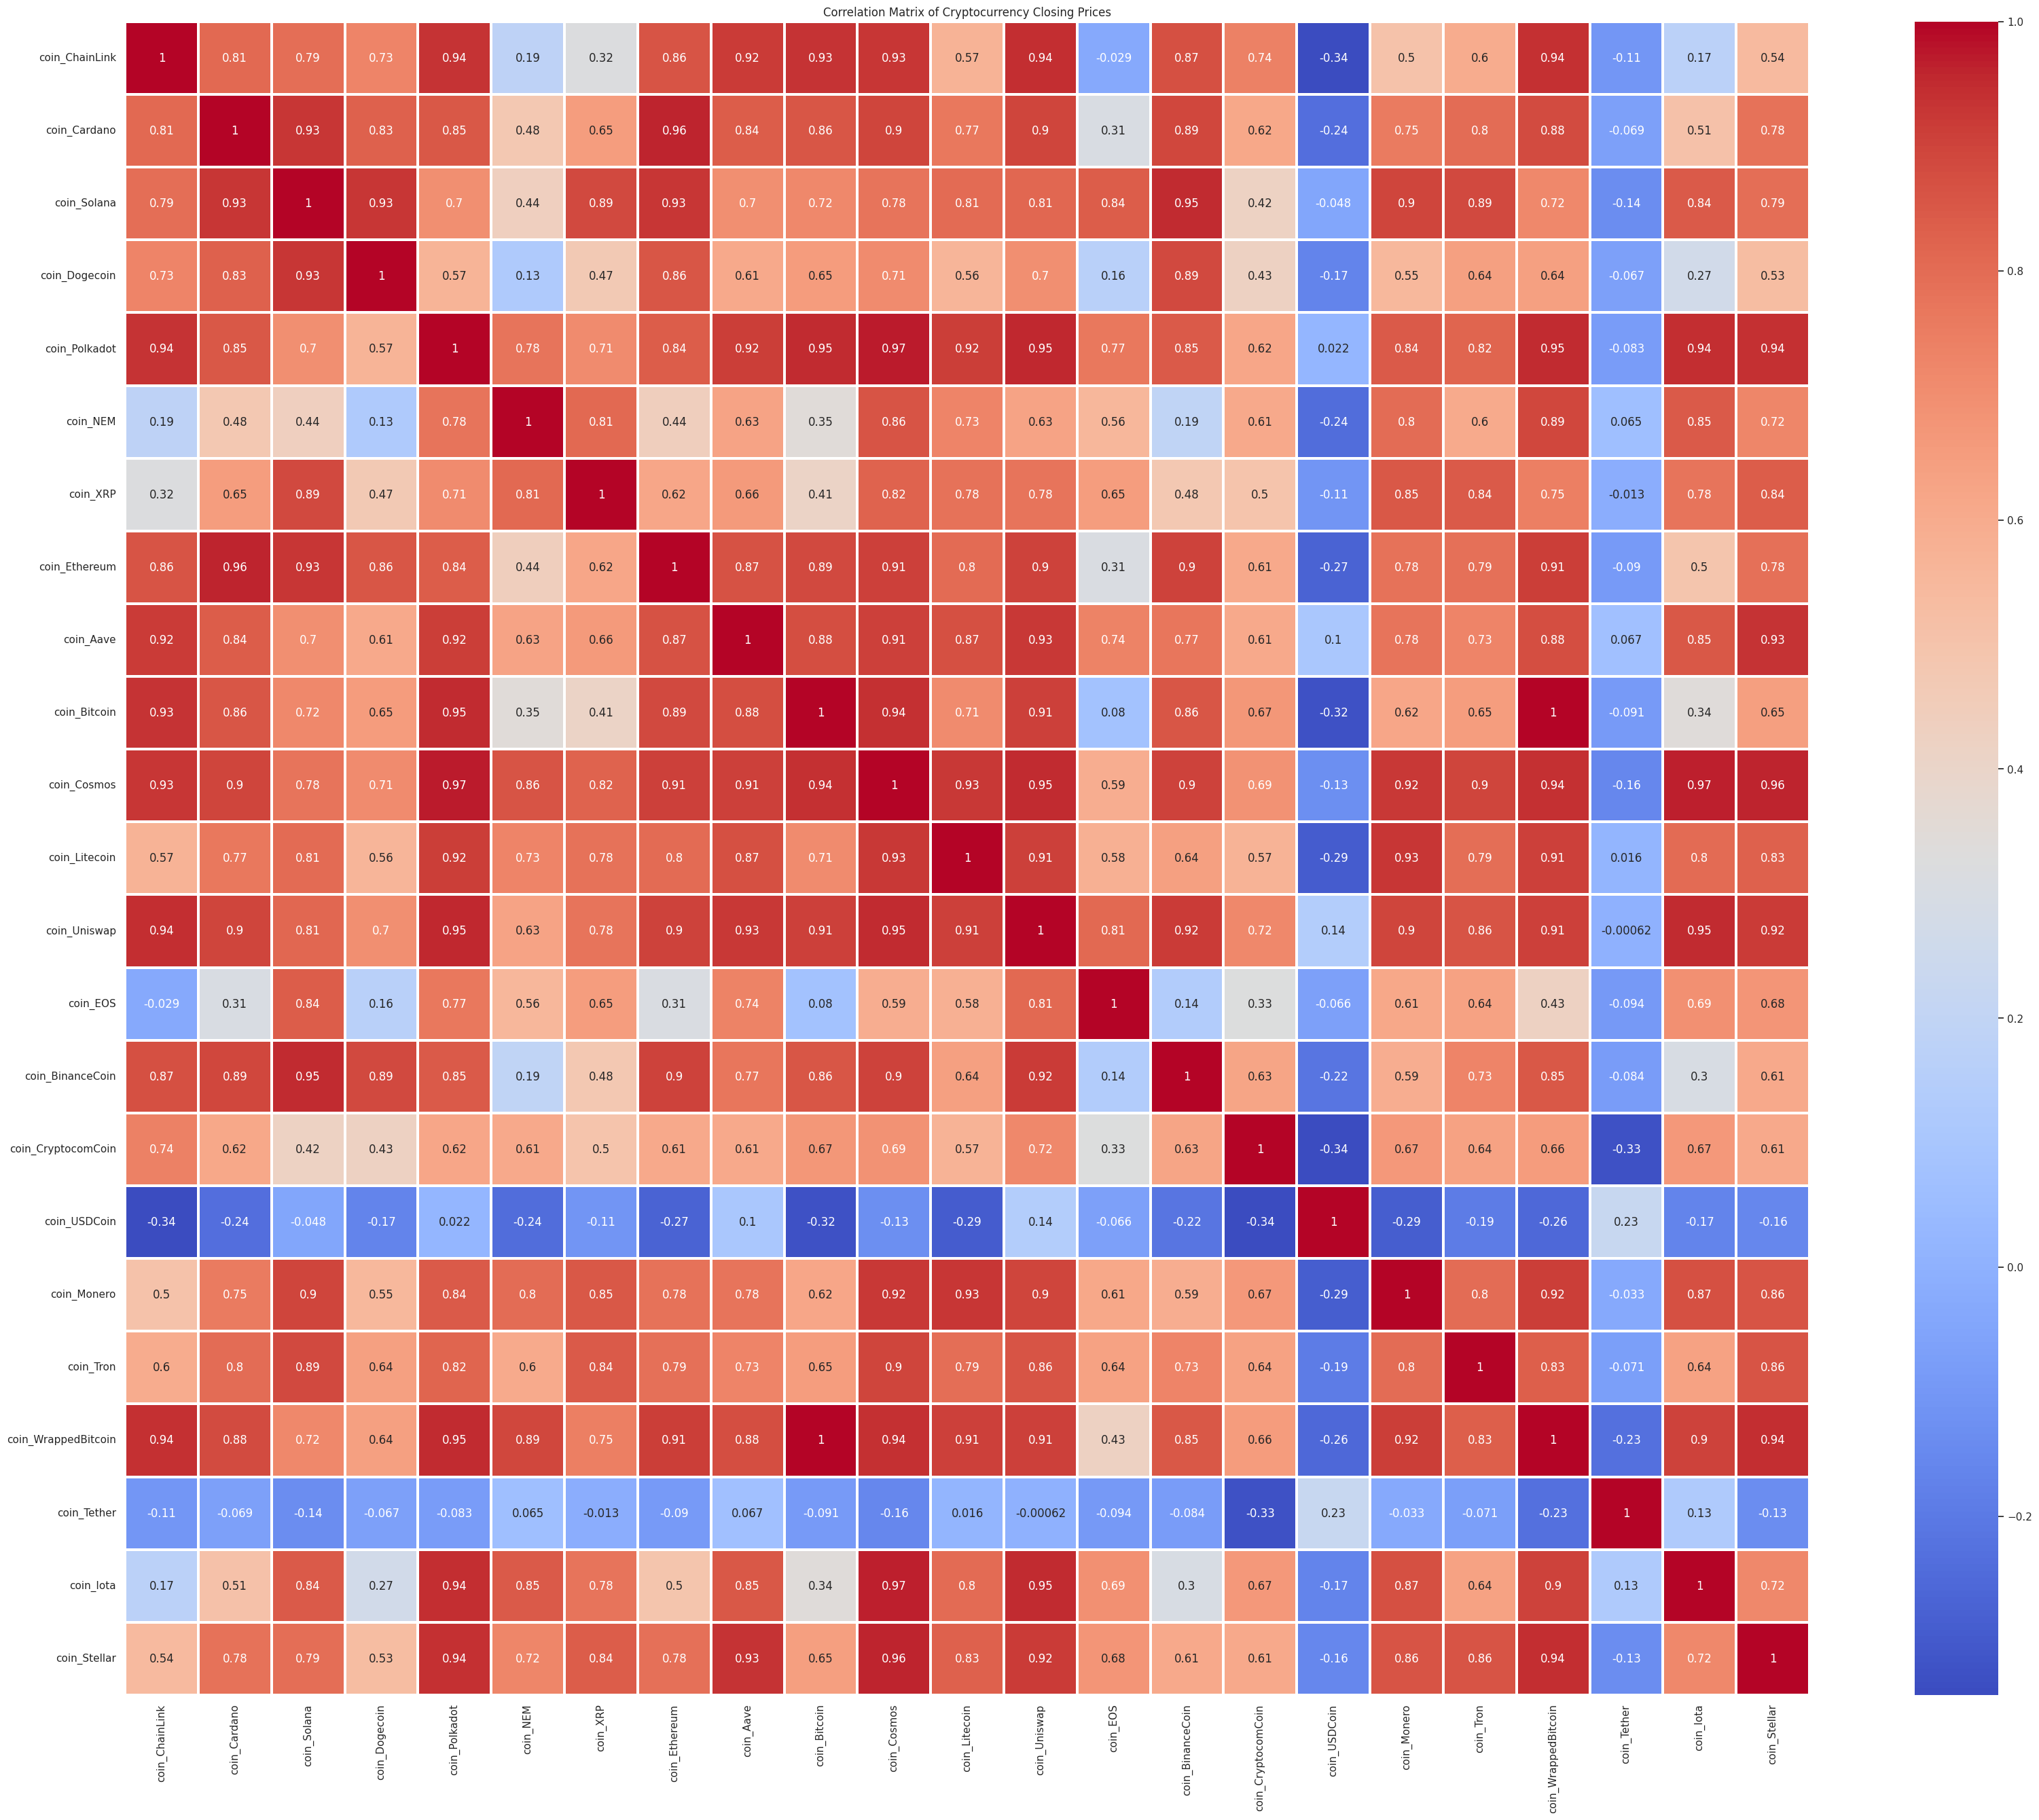

<Figure size 1400x700 with 0 Axes>

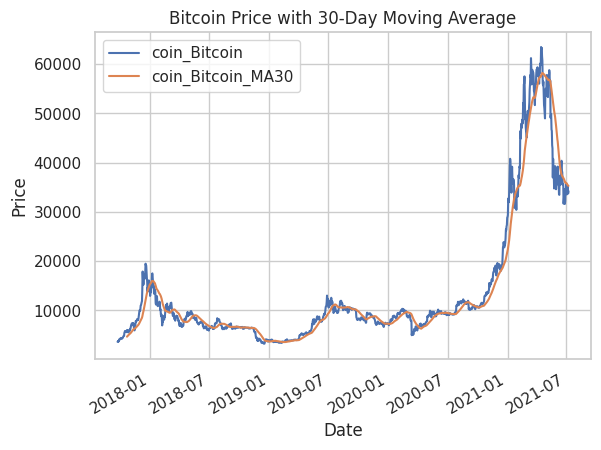

<Figure size 20000x10000 with 0 Axes>

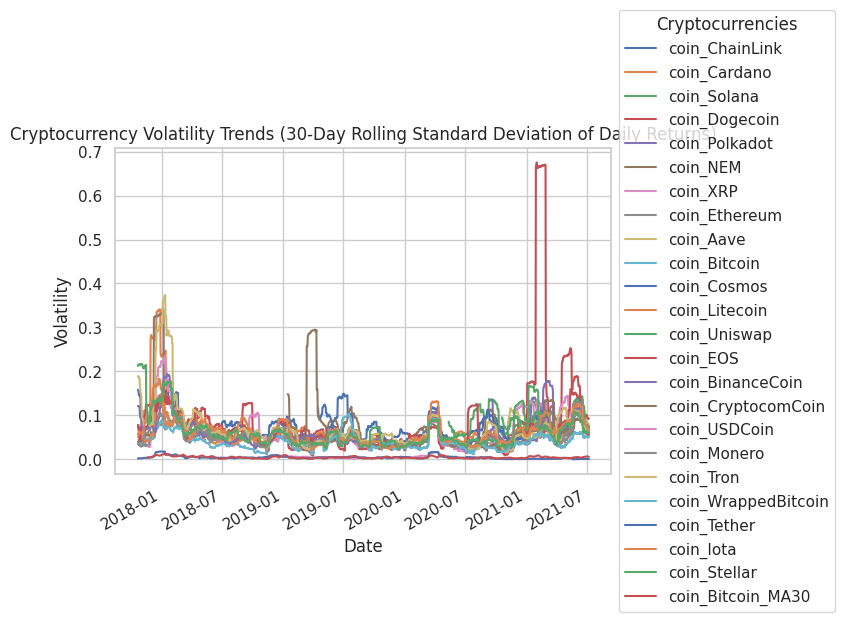

In [1]:
# %% [code] {"execution":{"iopub.status.busy":"2024-08-12T02:02:37.584231Z","iopub.execute_input":"2024-08-12T02:02:37.585674Z","iopub.status.idle":"2024-08-12T02:02:37.594389Z","shell.execute_reply.started":"2024-08-12T02:02:37.585628Z","shell.execute_reply":"2024-08-12T02:02:37.592575Z"}}
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")


# %% [code] {"execution":{"iopub.status.busy":"2024-08-12T02:02:37.597505Z","iopub.execute_input":"2024-08-12T02:02:37.598021Z","iopub.status.idle":"2024-08-12T02:02:37.888496Z","shell.execute_reply.started":"2024-08-12T02:02:37.597985Z","shell.execute_reply":"2024-08-12T02:02:37.887365Z"}}
# Load all CSV files from the directory
file_paths = glob.glob('/kaggle/input/cryptocurrencypricehistory/*.csv')

# Load datasets into a dictionary of DataFrames
crypto_dfs = {file_path.split('/')[-1].replace('.csv', ''): pd.read_csv(file_path) for file_path in file_paths}

# Display the first few rows of each dataset
for name, df in crypto_dfs.items():
    print(f"Dataset: {name}")
    print(df.head(), "\n")


# %% [code] {"execution":{"iopub.status.busy":"2024-08-12T02:02:37.889951Z","iopub.execute_input":"2024-08-12T02:02:37.890285Z","iopub.status.idle":"2024-08-12T02:02:38.515637Z","shell.execute_reply.started":"2024-08-12T02:02:37.890256Z","shell.execute_reply":"2024-08-12T02:02:38.514571Z"}}
# Check basic information and summary statistics for each dataset
for name, df in crypto_dfs.items():
    print(f"Dataset: {name}")
    print(df.info())
    print(df.describe(), "\n")
    print(f"Missing values in {name} dataset:\n", df.isnull().sum(), "\n")


# %% [code] {"execution":{"iopub.status.busy":"2024-08-12T02:02:38.518194Z","iopub.execute_input":"2024-08-12T02:02:38.518574Z","iopub.status.idle":"2024-08-12T02:02:38.593684Z","shell.execute_reply.started":"2024-08-12T02:02:38.518541Z","shell.execute_reply":"2024-08-12T02:02:38.592537Z"}}
# Handle missing values (drop rows with missing values)
for name, df in crypto_dfs.items():
    crypto_dfs[name] = df.dropna()

    # Confirm that there are no missing values left
    print(f"After handling missing values, {name} dataset:")
    print(crypto_dfs[name].isnull().sum(), "\n")


# %% [code] {"execution":{"iopub.status.busy":"2024-08-12T02:02:38.595131Z","iopub.execute_input":"2024-08-12T02:02:38.595463Z","iopub.status.idle":"2024-08-12T02:02:38.688546Z","shell.execute_reply.started":"2024-08-12T02:02:38.595435Z","shell.execute_reply":"2024-08-12T02:02:38.687455Z"}}
# Initialize an empty DataFrame for combined close prices with Date as the index
combined_close = pd.DataFrame()

# Align each dataset based on the 'Date' column
for name, df in crypto_dfs.items():
    # Convert the 'Date' column to datetime
    df['Date'] = pd.to_datetime(df['Date'])
    
    # Set the 'Date' as the index
    df.set_index('Date', inplace=True)
    
    # Add the 'Close' column to the combined DataFrame, aligning on the 'Date'
    combined_close[name] = df['Close']

# Display the combined close prices
print(combined_close.head())


# %% [code] {"execution":{"iopub.status.busy":"2024-08-12T02:02:38.689960Z","iopub.execute_input":"2024-08-12T02:02:38.690276Z","iopub.status.idle":"2024-08-12T02:02:39.848987Z","shell.execute_reply.started":"2024-08-12T02:02:38.690247Z","shell.execute_reply":"2024-08-12T02:02:39.847801Z"}}
# Plot the closing prices of all cryptocurrencies
plt.figure(figsize=(14, 7))
combined_close.plot()
plt.title('Cryptocurrency Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title="Cryptocurrencies")
plt.show()


# %% [code] {"execution":{"iopub.status.busy":"2024-08-12T02:02:41.892098Z","iopub.execute_input":"2024-08-12T02:02:41.892543Z","iopub.status.idle":"2024-08-12T02:02:44.437861Z","shell.execute_reply.started":"2024-08-12T02:02:41.892506Z","shell.execute_reply":"2024-08-12T02:02:44.436632Z"}}
# Calculate the correlation matrix
corr_matrix = combined_close.corr()

# Plot the correlation matrix
plt.figure(figsize=(40, 32))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=1.5)
plt.title('Correlation Matrix of Cryptocurrency Closing Prices')
plt.show()


# %% [code] {"execution":{"iopub.status.busy":"2024-08-12T02:02:44.439796Z","iopub.execute_input":"2024-08-12T02:02:44.440200Z","iopub.status.idle":"2024-08-12T02:02:45.197090Z","shell.execute_reply.started":"2024-08-12T02:02:44.440165Z","shell.execute_reply":"2024-08-12T02:02:45.195808Z"}}
# Assuming the actual column name for Bitcoin is 'coin_Bitcoin'
bitcoin_column = 'coin_Bitcoin'  # Replace this with the correct column name

# Calculate the 30-day moving average for Bitcoin
combined_close[f'{bitcoin_column}_MA30'] = combined_close[bitcoin_column].rolling(window=30).mean()

# Plot the Bitcoin price along with the 30-day moving average
plt.figure(figsize=(14, 7))
combined_close[[bitcoin_column, f'{bitcoin_column}_MA30']].plot()
plt.title('Bitcoin Price with 30-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='best')
plt.show()


# %% [code] {"execution":{"iopub.status.busy":"2024-08-12T02:02:45.200935Z","iopub.execute_input":"2024-08-12T02:02:45.201383Z","iopub.status.idle":"2024-08-12T02:02:46.409230Z","shell.execute_reply.started":"2024-08-12T02:02:45.201342Z","shell.execute_reply":"2024-08-12T02:02:46.408170Z"}}
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `combined_close` DataFrame already exists

# Step 1: Calculate daily returns
daily_returns = combined_close.pct_change()

# Step 2: Calculate 30-day rolling volatility
volatility = daily_returns.rolling(window=30).std()

# Step 3: Visualize the volatility trends
plt.figure(figsize=(200, 100))
volatility.plot()
plt.title('Cryptocurrency Volatility Trends (30-Day Rolling Standard Deviation of Daily Returns)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title="Cryptocurrencies")
plt.show()
